In [1]:
import sqlite3
import pandas as pd
import plotly.express as px
import nbformat

In [2]:
import geodatasets
import geopandas

df = geopandas.read_file(geodatasets.get_path("nybb"))

Extracting 'nybb_16a/nybb.shp' from '/home/till/.cache/geodatasets/nybb_16a.zip' to '/home/till/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from '/home/till/.cache/geodatasets/nybb_16a.zip' to '/home/till/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from '/home/till/.cache/geodatasets/nybb_16a.zip' to '/home/till/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from '/home/till/.cache/geodatasets/nybb_16a.zip' to '/home/till/.cache/geodatasets/nybb_16a.zip.unzip'


<Axes: >

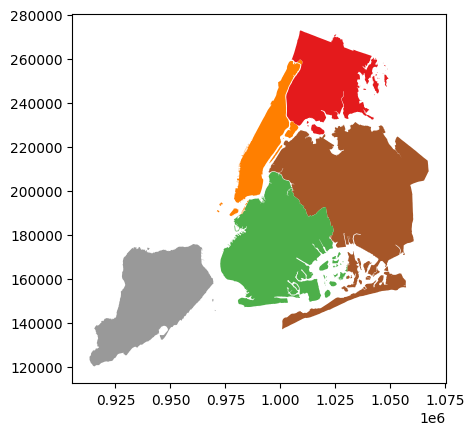

In [3]:
df.plot("BoroName", cmap="Set1") 

In [8]:
fn = 'dump.sqlite'
points = pd.read_sql('select * from points where not banned', sqlite3.connect(fn))
points = points[['lat', 'lon', 'wait']]
points = points.dropna()

In [12]:
waiting_time_per_point = points.groupby(["lat", "lon"]).mean()

In [13]:
waiting_time_per_point.to_csv("waiting_time_per_point.csv", index=True)

In [7]:

fig = px.density_mapbox(points, lat = 'lat', lon = 'lon', z = 'rating',
                        radius = 10,
                        center = dict(lat = 29.00, lon = 17.00),
                        zoom = 3,
                        mapbox_style = 'open-street-map')
fig.show()